In [0]:
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [0]:
from keras.models import Sequential

In [0]:
import keras
def model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=128,activation="relu",kernel_initializer="uniform"))
  model.add(Dense(units=1,activation="sigmoid",kernel_initializer="uniform"))
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
  model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])
  return model

In [0]:
classifier = model()

In [193]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
__________

In [0]:
from keras.utils import plot_model

In [0]:
plot_model(classifier,to_file="model.png")

In [0]:
import matplotlib.pyplot as plt

In [0]:
import matplotlib.image as mimg

In [0]:
image = mimg.imread('./model.png')

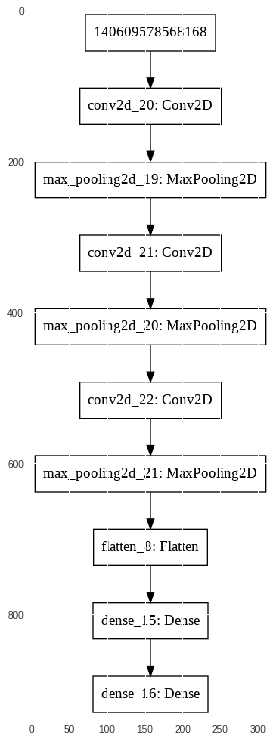

In [199]:
plt.figure(figsize=(13,13))
plt.imshow(image)
plt.show()

In [0]:
import zipfile
train = zipfile.ZipFile('train.zip', 'r')
train.extractall('training/')
test = zipfile.ZipFile('test1.zip','r')
test.extractall('test/')
zip_ref.close()

In [0]:
import os
filenames = os.listdir("./training/train")

In [0]:
import pandas as pd
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('1')
    else:
        categories.append('0')

dataset = pd.DataFrame({
    'filename': filenames,
    'category': categories
})



In [203]:
dataset.head()

,category,filename
0,0,cat.10898.jpg
1,1,dog.8215.jpg
2,1,dog.7416.jpg
3,0,cat.11770.jpg
4,0,cat.5330.jpg


In [0]:
dataset.category=dataset.category.astype('str')

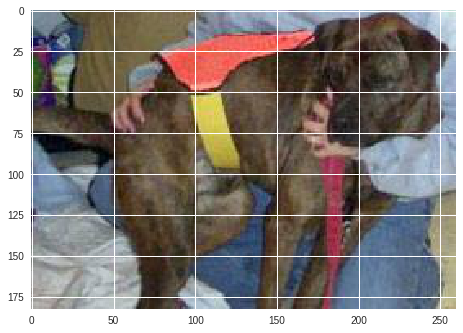

In [205]:
from keras.preprocessing.image import load_img
import random
import matplotlib.pyplot as plt
sample = random.choice(filenames)
image = load_img("./training/train/"+sample)
plt.imshow(image)

In [0]:
from sklearn.model_selection import train_test_split
trainingDataset, validatingDataset = train_test_split(dataset, test_size=0.20, random_state=42)
trainingDataset = trainingDataset.reset_index(drop=True)
validatingDataset = validatingDataset.reset_index(drop=True)

In [207]:
trainingDataset.head()

,category,filename
0,1,dog.3506.jpg
1,1,dog.7886.jpg
2,0,cat.6189.jpg
3,1,dog.5318.jpg
4,0,cat.3552.jpg


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [209]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    trainingDataset, 
    "./training/train", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='binary',
    batch_size=15
)


Found 20000 images belonging to 2 classes.


In [210]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validatingDataset, 
    "./training/train", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='binary',
    batch_size=15
)


Found 5000 images belonging to 2 classes.


In [0]:
classfier = model()

In [212]:
classifier.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100,
    validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6945 - acc: 0.5180 - val_loss: 0.6918 - val_acc: 0.5187
Epoch 2/100
100/100 [==============================] - 17s 165ms/step - loss: 0.6870 - acc: 0.5347 - val_loss: 0.6843 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6820 - acc: 0.5633 - val_loss: 0.6930 - val_acc: 0.5280
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6685 - acc: 0.5847 - val_loss: 0.6430 - val_acc: 0.6600
Epoch 5/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6608 - acc: 0.6007 - val_loss: 0.6276 - val_acc: 0.6680
Epoch 6/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6544 - acc: 0.6080 - val_loss: 0.6907 - val_acc: 0.5453
Epoch 7/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6434 - acc: 0.6280 - val_loss: 0.7216 - val_acc: 0.5500
Epoch 8/100
100/100 [===========================

In [0]:
testingFiles = os.listdir('./test/test1')

In [0]:
testDataset = pd.DataFrame({
    'fileName' : testingFiles
})

In [215]:
testDataset.count()

fileName    12500
dtype: int64

In [216]:
testDataset.head()

,fileName
0,11518.jpg
1,6153.jpg
2,127.jpg
3,2584.jpg
4,3242.jpg


In [217]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    testDataset, 
    "./test/test1", 
    x_col='fileName',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=10,
    shuffle=False
)

Found 12500 images.


In [0]:
predict = classifier.predict_generator(test_generator, steps=1250)

In [0]:
testDataset['prediction'] = predict

In [0]:
import numpy as np
testDataset['prediction'] = np.where(testDataset['prediction']>0.5,"dog","cat")

In [221]:
testDataset.head()

,fileName,prediction
0,11518.jpg,cat
1,6153.jpg,cat
2,127.jpg,cat
3,2584.jpg,cat
4,3242.jpg,cat


In [0]:
image = testDataset.iloc[150,:]

In [223]:
image.fileName

'9457.jpg'

In [0]:
predictedImage = load_img('./test/test1/'+image.fileName)

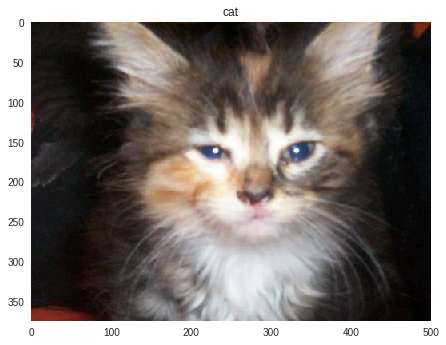

In [225]:
plt.title(image.prediction)
plt.imshow(predictedImage)
plt.grid(False)
plt.show()